In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

In [2]:
#Como trabajamos con Visual, esta línea imprime los gráficos
%matplotlib inline

In [3]:
df = pd.read_csv("../data/Data_limpia.csv")
df.columns

Index(['company', 'totalyearlycompensation', 'basesalary', 'gender', 'Race',
       'Education'],
      dtype='object')

## Análisis exploratorio de datos (EDA)

#### Preguntas de exploración

1. Valores que influyen en los salarios de los profesionales
* ¿Cuánto es el salario anual promedio de acuerdo al género?
* ¿Cuánto es el salario anual promedio de acuerdo al nivel de educación?
* ¿Cuánto es el salario anual promedio de acuerdo a la empresa donde se labora?

2. Valores que influyen en el porcentaje de participación de estos profesionales
* ¿Qué % de estos profesionales son de la raza?
* ¿Qué % de las personas que laboran en este rubro cuentan con educación profesional?
* ¿Qué % de estos profesionales cuentan con bachillerato?

#### 1. Valores que ingluyen en los salarios

In [4]:
#Según el género
df_gender = df.groupby('gender').agg({"totalyearlycompensation":"mean", "basesalary":"mean"})
df_gender

,totalyearlycompensation,basesalary
gender,,
Female,185895.749441,134213.031987
Male,194477.590499,135454.572479
No especificado,205336.066936,141187.041925
Other,205506.811989,141060.441505


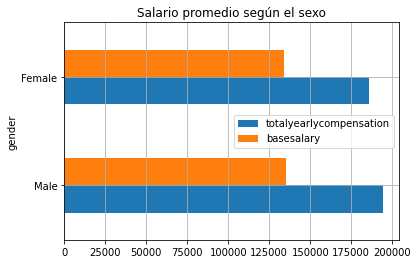

In [5]:
df_gender.loc[['Male','Female']].plot.barh(title = 'Salario promedio según el sexo').grid()

Se observa, gracias al gráfico, cómo en este rubro no existe un sesgo que afecte los promedios del salario base ni la suma anual de los profesionales masculinos y femeninos

In [6]:
#Según el nivel de educación
df_education = df.groupby('Education').agg({"totalyearlycompensation":"mean", "basesalary":"mean"})
df_education

,totalyearlycompensation,basesalary
Education,,
Bachelor's Degree,170375.245412,123389.756722
Highschool,175760.000000,124990.000000
Master's Degree,201819.621128,140738.639884
No especificado,202671.897109,139716.924945
PhD,248694.014795,160766.644250
Some College,188984.939759,135222.891566


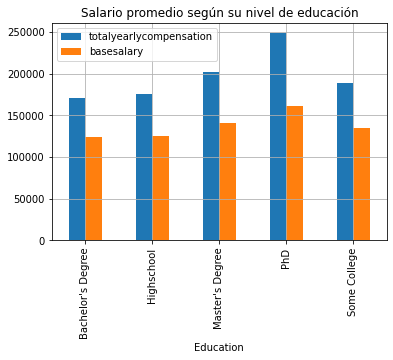

In [7]:
df_education.iloc[[0,1,2,4,5]].plot.bar(title = 'Salario promedio según su nivel de educación').grid()

In [8]:
#Según la empresa
df_empresa = df.groupby('company').agg({"totalyearlycompensation":"mean", "basesalary":"mean"})
top_15_empresa = df_empresa.sort_values(by=['totalyearlycompensation'],ascending = False).head(15)

In [9]:
top_15_empresa

,totalyearlycompensation,basesalary
company,,
PDT PARTNERS,350000.000000,207500.000000
JANE STREET CAPITAL,350000.000000,195000.000000
CLOUDKITCHENS,345000.000000,180000.000000
HUDSON RIVER TRADING,323500.000000,182000.000000
AURORA,316714.285714,188857.142857
LYFT,313969.696970,168651.267640
CHIME,311750.000000,182550.000000
WAYMO,301367.346939,177279.332271
JANE STREET,300714.285714,171142.857143


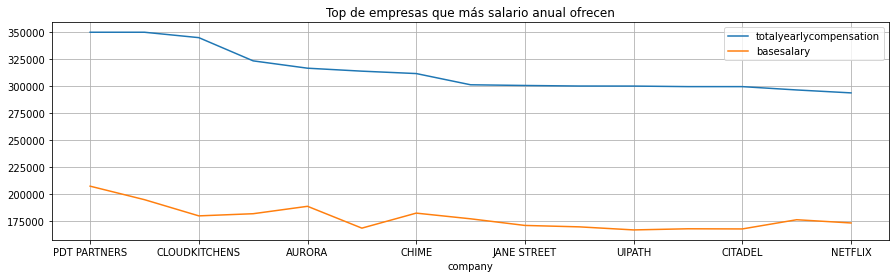

In [10]:
#Top 15 de empresas que más pagan en este rubro
top_15_empresa.plot.line(figsize = (15, 4), title = 'Top de empresas que más salario anual ofrecen').grid()

Visualizamos que las empresas más conocidas no lideran la cabeza en cuanto a oferta salarial se refiere

#### 2. Valores que influyen en el porcentaje de participación de estos profesionales

In [11]:
#Por raza
x_raza = df['Race'].value_counts()
x_raza

No especificado    37335
Asian              10851
White               7570
Hispanic            1074
Two Or More          757
Black                665
Name: Race, dtype: int64

<AxesSubplot:ylabel='Race'>

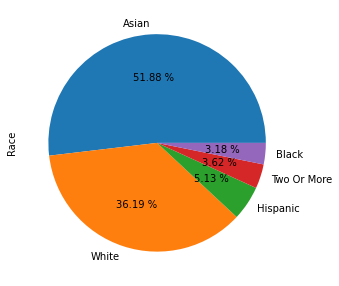

In [12]:
x_raza.iloc[1:6].plot.pie(autopct="%0.2f %%", figsize = (10,5))

El grafico muestra el porcentaje de participacion de los profesionales en Data Science segun su raza, observamos que las personas de raza asiatica tienen una mayor participacion como profesionales de Data Science con 52.59% seguido de la raza blanca con 35.33% y las demas raza con porcentajes de participacion pequeños. Suponiendo que no existe sesgo racial al momento de contratar, estos datos signican que las personas de las razas asiatica y blanca son las que tienen mas interes en estudiar Data Science.

In [13]:
#Por género
df_part_gender = df['gender'].value_counts().reset_index().rename(columns={'index':'Genero','gender':'Cantidad'}).drop(1)
df_part_gender

,Genero,Cantidad
0,Male,33133
2,Female,6705
3,Other,367


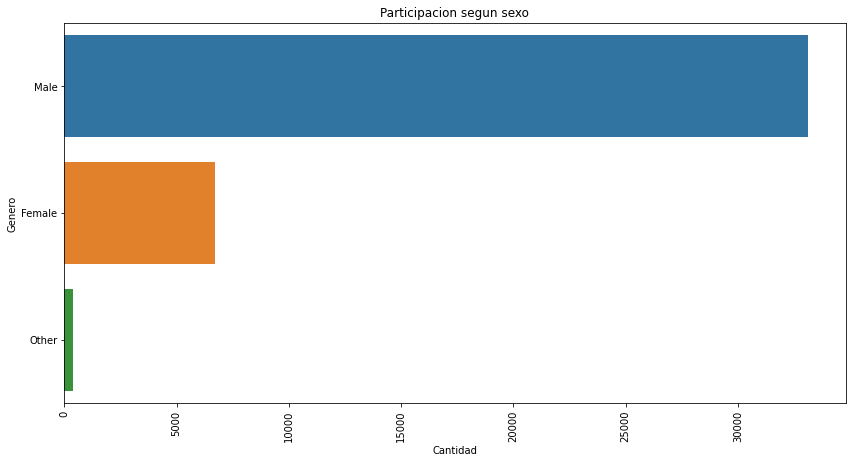

In [14]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.title("Participacion segun sexo")
sns.barplot(x='Cantidad',y='Genero', data=df_part_gender)
plt.show()

El grafico muestra la cantidad de participacion de los profesionales en Data Science segun su genero, observamos que los hombres tienen una mayor participacion como profesionales de Data Science con 29754 profesionales. Suponiendo que no existe sesgo de genero al momento de contratar, estos datos signican que los hombres tienen mas interes en estudiar Data Science.

In [15]:
#Por educación
part_educacion = df["Education"].value_counts().reset_index().rename(columns={'index':'Título','Education':'Cantidad'}).drop(0)
part_educacion

,Título,Cantidad
1,Master's Degree,14464
2,Bachelor's Degree,11715
3,PhD,1487
4,Some College,332
5,Highschool,300


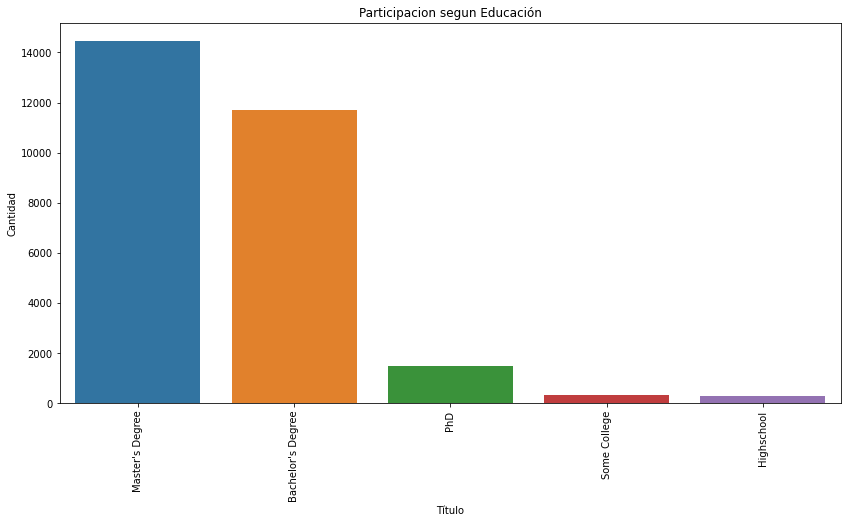

In [16]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.title("Participacion segun Educación")
sns.barplot(x='Título',y='Cantidad',data=part_educacion)
plt.show()

El grafico muestra la escala de participacion de los profesionales en Data Science segun su nivel de educación, observamos que las personas con título de maestria tienen una mayor participacion como profesionales de Data Science con 12976 profesionales seguido de personas con el titulo de bachiller y los demas titulos con cantidades de participacion pequeños. Esto significa que el titulo profesional es determinante a la hora de contratar a una persona en el area de Data Science.

Y relacionando al gráfico que obtuvimos en la primera parte del análisis (Salario promedio por nivel de educación) deducimos que por la poca cantidad de profesionales que hay con este nivel de educación (PhD) las empresas les otorgan un salario más elevado a comparación profesionales con menor nivel y que son más abundantes en el mercado laboral.